In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: set of individuals heights and weights, labeled as 'Adult' and 'Child'  
    40 children -> Gaussian([120, 50], [[90,10 ],[10, 40]])  
    120 adults -> Gaussian([150, 80], [[60, 10],[10, 40]])  

**Goal**: Fit a naive Bayesian Classifier, to classify next data:
    [[180,90],[110,20], [130, 60]]

## Prepare the data (Data Preprocessing)

### Load the data

In [3]:
# gen X
np.random.seed(1111)
children = np.random.multivariate_normal([120, 50], [[90,10 ],[10, 40]], 40)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)

X = np.concatenate((children ,adults),axis=0)

# gen y
# children => 0
# adult    => 1
y1 = np.zeros(len(children))
y2 = np.ones(len(adults))

y = np.concatenate((y1,y2),axis=0)
list(zip(X[38:43, :], y[38:43]))


[(array([106.99179548,  50.74679784]), 0.0),
 (array([119.93076096,  49.42162385]), 0.0),
 (array([147.72937616,  80.2958404 ]), 1.0),
 (array([138.78639016,  72.45896165]), 1.0),
 (array([153.06796323,  87.72067862]), 1.0)]

### Get insight of the data (Prepare and clean)

#### Clean

#### Visualize

<module 'matplotlib.pyplot' from '/home/nemsys/projects/courses/ProgressBG/ProgressBG-MLwithPython/ProgressBG-MLwithPython-Code/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

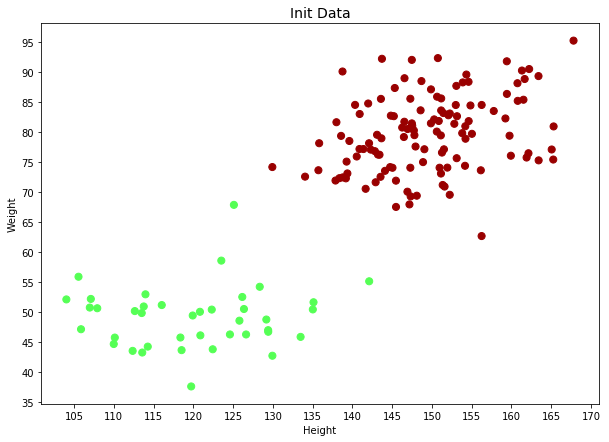

In [12]:
FIGSIZE=(10,7)
CHILD_COLOR = '#55FF55'
ADULT_COLOR = '#990000'

def target_colors(y):
    colors = np.vectorize(lambda i: CHILD_COLOR if i==0 else ADULT_COLOR)(y)
    return colors

def custom_plot(*args, **kwargs):
  fig, ax = plt.subplots(1,1, figsize=kwargs['figsize'])

  colors = target_colors(args[1])
    
  ax.scatter(args[0][:,0], args[0][:,1],c=colors, s=50, alpha=kwargs['alpha'])

  ax.set_xlabel(kwargs['xlabel'])
  ax.set_ylabel(kwargs['ylabel'])
  plt.title(kwargs['title'], size=14)

  tick_spacing = kwargs['tick_spacing']
  ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

  return plt


custom_plot(X,y, xlabel="Height", ylabel="Weight", 
            title="Init Data", figsize=FIGSIZE, 
            alpha=1, tick_spacing=5)

## Select features

## Separate the training data from the test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

X_train: [[112.65155396  50.1597925 ]
 [143.71590109  92.23941953]
 [156.24541664  62.67317224]
 [165.25116492  75.43405707]
 [144.83595897  82.75274255]]
 y_train: [0. 1. 1. 1. 1.]

X_test: [[145.48537465  67.53089824]
 [147.2857646   74.06959812]
 [145.33023489  87.3676786 ]
 [155.02759383  79.72252571]
 [152.07232907  82.81676175]]
 y_test: [1. 1. 1. 1. 1.]



## Choose the model

GaussianNB |
MultinomialNB

## Train the model (fit the model)

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predict (classify unknown input sample)

In [15]:
y_pred = model.predict(X_test)

## Evaluate the model

In [16]:
from sklearn import metrics

In [21]:
# get metrics:
r2 = metrics.r2_score(y_test, y_pred)

# print it
print('{:10s}: {}'.format('r2_score', r2) )

r2_score  : 0.8746081504702194


In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.97      1.00      0.98        29

   micro avg       0.97      0.97      0.97        40
   macro avg       0.98      0.95      0.97        40
weighted avg       0.98      0.97      0.97        40

